# Analyzing Meteorite Dataset 

In [3]:
import sys
sys.executable


'/usr/local/opt/python/bin/python3.7'

In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit   # for testing code runtime
from statistics import mode 

In [17]:
meteor = pd.read_csv('meteorite-landings.csv')
meteor = pd.DataFrame(meteor)


print(meteor)
print("\n\n\n")

# print(meteor.describe())
meteor.info()
print("\n\n\n")

#list all column names
print(list(meteor.columns))

print("\n\n\n")
# print(meteor['fall'])

print(np.max(meteor['year']))
print(np.min(meteor['year']))
print(mode(meteor['year']))

             name     id nametype              recclass      mass   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong               GeoLocation  
0      1880.0  50.77500 

Maximum mass:  60000000.0
Minimum mass:  0.0
Mean mass:  13278.078548601516


Text(0, 0.5, 'year')

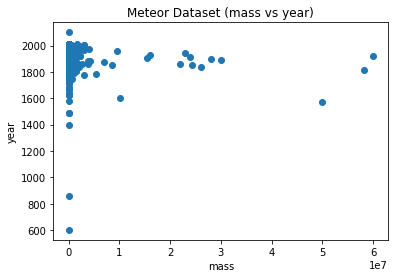

In [6]:
# # visualizing mass

print("Maximum mass: ", np.max(meteor['mass']))
print("Minimum mass: ", np.min(meteor['mass']))
print("Mean mass: ",np.mean(meteor['mass']))


# create a figure and axis 
fig, ax = plt.subplots() 


# scatter the sepal_length against the sepal_width
ax.scatter(meteor['mass'], meteor['year'])
# set a title and labels
ax.set_title('Meteor Dataset (mass vs year)')
ax.set_xlabel('mass')
ax.set_ylabel('year')

In [3]:
# Testing a time analysis function
import timeit
code_to_test = """
a = range(100000)
b = []
for i in a:
    b.append(i*2)
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print(elapsed_time)

0.018367920410000026


In [8]:

bar_chart_time="""
# create a figure and axis 
fig, ax = plt.subplots() 


# scatter the sepal_length against the sepal_width
ax.scatter(meteor['mass'], meteor['year'])
# set a title and labels
ax.set_title('Meteor Dataset (mass vs year)')
ax.set_xlabel('mass')
ax.set_ylabel('year')
"""

In [9]:

# SAVE AS CSV FOR USE IN API DATABASE
# api_meteor_data.to_csv('api_meteor_data.csv')

In [10]:
   
# randomly selects 50 data points and puts them in data frame
api_meteor_data = meteor.loc[np.random.randint(len(meteor), size = 50)]
print(api_meteor_data)
print(type(api_meteor_data))

                              name     id nametype               recclass  \
37556                    Shişr 124  51678    Valid                    H~5   
42934                 Yamato 86180  29686    Valid                     H4   
16314                      Hammond  11813    Valid        Iron, ungrouped   
23793        Meteorite Hills 01101  16334    Valid                     L5   
32441  Queen Alexandra Range 93197  19286    Valid                     L5   
41929                Yamato 793283  28632    Valid                     H6   
40739                Yamato 791545  26894    Valid                     L4   
13781       Grove Mountains 020936  49810    Valid                     L5   
23431        Meteorite Hills 00738  15972    Valid                     H5   
16481                  Ilafegh 004  12009    Valid                     H5   
41379                Yamato 792671  28020    Valid                     H4   
21916        MacAlpine Hills 02599  14899    Valid                     L5   

In [30]:
# Convert to numpy array
api_meteor_data_arr = api_meteor_data.to_numpy()
print(api_meteor_data_arr[6].keys, api_meteor_data_arr[6])
# print(api_meteor_data.keys)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [50]:
meteor_test = pd.read_csv('meteorite-landings.csv')
meteor_test_50 = meteor.loc[np.random.randint(len(meteor), size = 50)]
# print(type(meteor_test_50))
# print(meteor_test_50.to_dict('records'))
# print(type(meteor_test_50))
# meteor_test_50.to_csv('meteor_test_50.csv')
import csv
reader = csv.DictReader(
    open("meteor_test_50.csv"),
    fieldnames=['order', 'name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation']
)
all_meteors = []
for row in reader:
#     print(row)
    all.append(row)
#     print(all, '\n')
print(all)

# all.to_csv('meteor_test_50.csv')


[OrderedDict([('order', ''), ('name', 'name'), ('id', 'id'), ('nametype', 'nametype'), ('recclass', 'recclass'), ('mass', 'mass'), ('fall', 'fall'), ('year', 'year'), ('reclat', 'reclat'), ('reclong', 'reclong'), ('GeoLocation', 'GeoLocation')]), OrderedDict([('order', '21477'), ('name', 'Lewis Cliff 88768'), ('id', '14505'), ('nametype', 'Valid'), ('recclass', 'H6'), ('mass', '11.6'), ('fall', 'Found'), ('year', '1988.0'), ('reclat', '-84.23174'), ('reclong', '161.54752'), ('GeoLocation', '(-84.231740, 161.547520)')]), OrderedDict([('order', '36643'), ('name', 'Sahara 98058'), ('id', '23002'), ('nametype', 'Valid'), ('recclass', 'H5'), ('mass', '681.0'), ('fall', 'Found'), ('year', '1998.0'), ('reclat', ''), ('reclong', ''), ('GeoLocation', '')]), OrderedDict([('order', '33629'), ('name', 'Queen Alexandra Range 97067'), ('id', '20474'), ('nametype', 'Valid'), ('recclass', 'LL5'), ('mass', '17.4'), ('fall', 'Found'), ('year', '1997.0'), ('reclat', '-84.0'), ('reclong', '168.0'), ('GeoL

In [43]:
# Testing Geolocation conversion
from geopy.geocoders import Nominatim
geo_test = api_meteor_data_arr[2]
geolocator = Nominatim(user_agent="api_meteor_data_arr")
print(geo_test[9])

location = geolocator.reverse("52.509669, 13.376294")
print(location)
coor = str(geo_test[9])[1:-1]
print(coor)
location = geolocator.reverse(coor)
print(location)
print(location.address)

(19.133330, 54.652670)
Steinecke, Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland
19.133330, 54.652670
محافظة ظفار, سلطنة عُمان Oman
محافظة ظفار, سلطنة عُمان Oman
